In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression, MultiTaskElasticNetCV, Lasso, Ridge, BayesianRidge, ARDRegression, PassiveAggressiveRegressor, TheilSenRegressor, HuberRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_landmarks = pd.read_parquet('landmarks.parquet')
df_target = pd.read_parquet('ground_truth.parquet')

In [3]:
data = pd.merge(df_landmarks, df_target, left_index=True, right_index=True)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1426,1427,1428,1429,1430,1431,1432,1433,eye_Y,eye_X
count,38322.000000,38322.000000,38322.000000,38322.000000,38322.000000,38322.000000,38322.000000,38322.000000,38322.000000,38322.000000,...,38322.000000,38322.000000,38322.000000,38322.000000,38322.000000,38322.000000,38322.000000,38322.000000,38322.000000,38322.000000
mean,0.004949,0.337747,0.239806,0.001509,0.081994,0.029109,0.003116,0.155725,0.226890,-0.069245,...,-0.546968,0.457124,0.335327,-0.474530,0.457124,0.415962,-0.402331,0.457124,-0.053986,0.082244
std,0.110199,0.076695,0.070121,0.014244,0.007628,0.012597,0.059346,0.034622,0.039309,0.042997,...,0.113583,0.141366,0.152586,0.107936,0.141366,0.153352,0.114008,0.141366,0.318821,0.317076
min,-0.635574,-0.063685,-0.080682,-0.085888,0.010556,-0.027518,-0.277414,-0.031903,0.036691,-0.255515,...,-1.004721,-0.299708,-0.480043,-0.899881,-0.299708,-0.378496,-0.861220,-0.299708,-0.999635,-0.989144
25%,-0.056458,0.286507,0.194058,-0.007283,0.077733,0.021842,-0.028806,0.132857,0.202571,-0.091489,...,-0.625973,0.371139,0.259630,-0.550252,0.371139,0.340622,-0.481415,0.371139,-0.267814,-0.068393
50%,0.007169,0.337807,0.245058,0.000000,0.082701,0.030231,0.000000,0.154817,0.229873,-0.071323,...,-0.556002,0.463132,0.341721,-0.484113,0.463132,0.425087,-0.411422,0.463132,-0.043277,0.083432
75%,0.065115,0.391454,0.288789,0.008294,0.086979,0.037570,0.033940,0.179444,0.252902,-0.049476,...,-0.480617,0.552601,0.421940,-0.410055,0.552601,0.503529,-0.335214,0.552601,0.159705,0.241324
max,0.687163,0.671962,0.576925,0.087527,0.126491,0.083747,0.311230,0.307837,0.455957,0.177384,...,0.571079,1.258492,0.952010,0.528248,1.258492,1.058322,0.656741,1.258492,0.986267,0.999055


In [4]:
y = data[['eye_X', 'eye_Y']]
X = data.drop(columns=['eye_X', 'eye_Y'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [30]:
pipeline_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),
    ('regression', LinearRegression())
])
pipeline_linear.fit(X_train, y_train)

y_pred = pipeline_linear.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2_linear = r2_score(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error:", [str(round(x*100, 2))+'%' for x in mse_linear])
print("R2 Score:", [str(round(x*100, 2))+'%' for x in r2_linear])

Mean Squared Error: ['4.03%', '3.55%']
R2 Score: ['60.74%', '65.6%']


In [31]:
pipeline_elasticnet = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),
    ('regression', MultiTaskElasticNetCV(cv=10, random_state=42))
])
pipeline_elasticnet.fit(X_train, y_train)

y_pred = pipeline_elasticnet.predict(X_test)

mse_elasticnet = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2_elasticnet = r2_score(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error:", [str(round(x*100, 2))+'%' for x in mse_elasticnet])
print("R2 Score:", [str(round(x*100, 2))+'%' for x in r2_elasticnet])

Mean Squared Error: ['4.19%', '3.8%']
R2 Score: ['59.16%', '63.21%']


In [32]:
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),
    ('regression', Lasso(alpha=0.001))
])
pipeline_lasso.fit(X_train, y_train)

y_pred = pipeline_lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2_lasso = r2_score(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error:", [str(round(x*100, 2))+'%' for x in mse_lasso])
print("R2 Score:", [str(round(x*100, 2))+'%' for x in r2_lasso])

Mean Squared Error: ['4.07%', '3.65%']
R2 Score: ['60.36%', '64.61%']


In [33]:
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),
    ('regression', Ridge(alpha=0.001))
])
pipeline_ridge.fit(X_train, y_train)

y_pred = pipeline_ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2_ridge = r2_score(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error:", [str(round(x*100, 2))+'%' for x in mse_ridge])
print("R2 Score:", [str(round(x*100, 2))+'%' for x in r2_ridge])

Mean Squared Error: ['4.03%', '3.54%']
R2 Score: ['60.77%', '65.67%']


In [34]:
pipeline_bayesianridge = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),
    ('regression', MultiOutputRegressor(BayesianRidge()))
])
pipeline_bayesianridge.fit(X_train, y_train)

y_pred = pipeline_bayesianridge.predict(X_test)

mse_bayesianridge = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2_bayesianridge = r2_score(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error:", [str(round(x*100, 2))+'%' for x in mse_bayesianridge])
print("R2 Score:", [str(round(x*100, 2))+'%' for x in r2_bayesianridge])

Mean Squared Error: ['4.02%', '3.55%']
R2 Score: ['60.78%', '65.6%']


In [39]:
pipeline_ard = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),
    ('regression', MultiOutputRegressor(ARDRegression()))
])
pipeline_ard.fit(X_train, y_train)

y_pred = pipeline_ard.predict(X_test)

mse_ard = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2_ard = r2_score(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error:", [str(round(x*100, 2))+'%' for x in mse_ard])
print("R2 Score:", [str(round(x*100, 2))+'%' for x in r2_ard])

Mean Squared Error: ['6.18%', '6.01%']
R2 Score: ['39.75%', '41.74%']


In [45]:
pipeline_passiveaggressive = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),
    ('regression', MultiOutputRegressor(PassiveAggressiveRegressor(C=1, validation_fraction=0.1, random_state=42)))
])
pipeline_passiveaggressive.fit(X_train, y_train)

y_pred = pipeline_passiveaggressive.predict(X_test)

mse_passiveaggressive = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2_passiveaggressive = r2_score(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error:", [str(round(x*100, 2))+'%' for x in mse_passiveaggressive])
print("R2 Score:", [str(round(x*100, 2))+'%' for x in r2_passiveaggressive])

Mean Squared Error: ['6.14%', '6.28%']
R2 Score: ['40.19%', '39.1%']


In [47]:
pipeline_theilsen = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),
    ('regression', MultiOutputRegressor(TheilSenRegressor(max_subpopulation=5000, random_state=42)))
])

pipeline_theilsen.fit(X_train, y_train)

y_pred = pipeline_theilsen.predict(X_test)

mse_theilsen = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2_theilsen = r2_score(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error:", [str(round(x*100, 2))+'%' for x in mse_theilsen])
print("R2 Score:", [str(round(x*100, 2))+'%' for x in r2_theilsen])

Mean Squared Error: ['4.18%', '3.86%']
R2 Score: ['59.29%', '62.55%']


In [50]:
pipeline_huber = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),
    ('regression', MultiOutputRegressor(HuberRegressor(epsilon=1.35)))
])
pipeline_huber.fit(X_train, y_train)

y_pred = pipeline_huber.predict(X_test)

mse_huber = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2_huber = r2_score(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error:", [str(round(x*100, 2))+'%' for x in mse_huber])
print("R2 Score:", [str(round(x*100, 2))+'%' for x in r2_huber])

C:\Users\felip\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Mean Squared Error: ['4.07%', '3.65%']
R2 Score: ['60.3%', '64.67%']


C:\Users\felip\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [54]:
grid_kneighbors = {
    'regression__estimator__n_neighbors': [7, 9, 11, 13, 15],
    'regression__estimator__weights': ['uniform', 'distance'],
    'regression__estimator__leaf_size': [10, 20, 30, 40, 50]
}

pipeline_kneighbors = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),
    ('regression', MultiOutputRegressor(KNeighborsRegressor()))
])

grid_search_kneighbors = GridSearchCV(pipeline_kneighbors, grid_kneighbors, cv=3)
grid_search_kneighbors.fit(X_train, y_train)

y_pred = grid_search_kneighbors.predict(X_test)

mse_kneighbors = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2_kneighbors = r2_score(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error:", [str(round(x*100, 2))+'%' for x in mse_kneighbors])
print("R2 Score:", [str(round(x*100, 2))+'%' for x in r2_kneighbors])

Mean Squared Error: ['7.21%', '5.51%']
R2 Score: ['29.74%', '46.59%']


In [55]:
print(grid_search_kneighbors.best_params_)

{'regression__estimator__leaf_size': 20, 'regression__estimator__n_neighbors': 15, 'regression__estimator__weights': 'distance'}


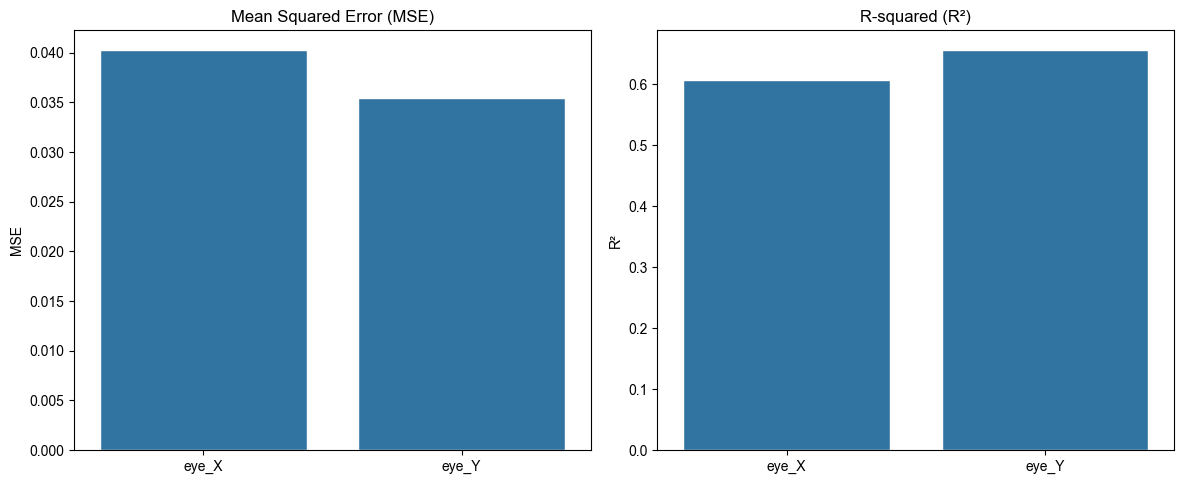

In [56]:
# Graphing results of the best model

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set(style="whitegrid")

sns.barplot(x=["eye_X", "eye_Y"], y=mse_bayesianridge, ax=axes[0])
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE')

sns.barplot(x=["eye_X", "eye_Y"], y=r2_bayesianridge, ax=axes[1])
axes[1].set_title('R-squared (R²)')
axes[1].set_ylabel('R²')

plt.tight_layout()
plt.show()

In [58]:
import pickle

with open('gaze_regressor.pkl', 'wb') as f:
    pickle.dump(pipeline_bayesianridge, f)